## Notebook Setup 

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

DATA_DIR = Path("..") / "datasets"
cpi = pd.read_csv(DATA_DIR / "CPIAUCSL.csv")  # filename can stay for now

cpi["date"] = pd.to_datetime(cpi["observation_date"])
cpi["inflation_rate"] = pd.to_numeric(cpi["FPCPITOTLZGUSA"], errors="coerce")

cpi = cpi.sort_values("date")
cpi["year"] = cpi["date"].dt.year


FileNotFoundError: [Errno 2] No such file or directory: '../datasets/CPIAUCSL.csv'

In [ ]:
cpi_2015_2025 = cpi[(cpi["year"] >= 2015) & (cpi["year"] <= 2025)].copy()
cpi_2015_2025


## Data Visualisation



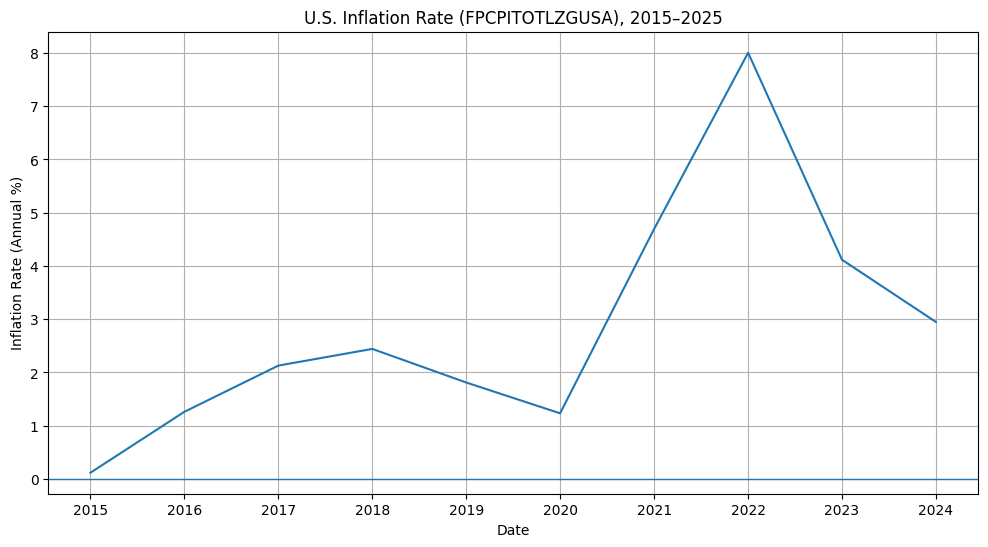

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(cpi_2015_2025["year"], cpi_2015_2025["inflation_rate"], marker="o")
plt.axhline(0, linewidth=1)
plt.xlabel("Year")
plt.ylabel("Inflation (Annual %)")
plt.title("U.S. Inflation (FPCPITOTLZGUSA), 2015–2025")
plt.grid(True)
plt.show()


In [ ]:
cpi_2015_2025["year"] = cpi_2015_2025["date"].dt.year

yearly_inflation = (
    cpi_2015_2025.groupby("year")["inflation_rate"]
    .mean()
    .reset_index()
)
yearly_inflation


,year,inflation_rate
0,2015,0.118627
1,2016,1.261583
2,2017,2.130110
3,2018,2.442583
4,2019,1.812210
5,2020,1.233584
6,2021,4.697859
7,2022,8.002800
8,2023,4.116338
9,2024,2.949525


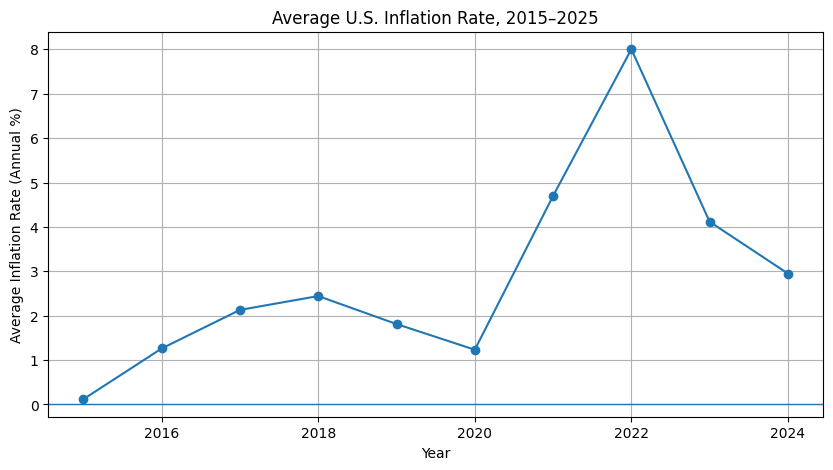

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(yearly_inflation["year"], yearly_inflation["inflation_rate"], marker="o")
plt.axhline(0, linewidth=1)
plt.xlabel("Year")
plt.ylabel("Average Inflation Rate (Annual %)")
plt.title("Average U.S. Inflation Rate, 2015–2025")
plt.grid(True)
plt.show()


In [ ]:
cpi[["observation_date","FPCPITOTLZGUSA"]].head()

,observation_date,FPCPITOTLZGUSA
0,1960-01-01,1.457976
1,1961-01-01,1.070724
2,1962-01-01,1.198773
3,1963-01-01,1.239669
4,1964-01-01,1.278912
